In [35]:
!nvidia-smi

Tue Jul 16 03:29:26 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |   1279MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!git clone "https://github.com/convman/Multimodal-MOSEI.git"

Cloning into 'Multimodal-MOSEI'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 501 (delta 3), reused 0 (delta 0), pack-reused 466
Receiving objects: 100% (501/501), 901.82 MiB | 39.11 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Checking out files: 100% (279/279), done.


In [1]:
cd Multimodal-MOSEI/

/content/Multimodal-MOSEI


In [2]:
ls

 audio_test.h5                       mosi2uni_Train_labels_5class.csv
 audio_train.h5                      mosi2uni_Train_labels_7class.csv
'cross modal'/                       mosi2uni_Train_labels_angry.csv
 data/                               mosi2uni_Train_labels_disgust.csv
 iemocap/                            mosi2uni_Train_labels_fear.csv
'iemocap sdk'/                       mosi2uni_Train_labels_happy.csv
 LICENSE                             mosi2uni_Train_labels_sad.csv
'MOSEI baseline results.png'         mosi2uni_Train_labels_surprise.csv
 mosi2uni_Test_labels_2class.csv    'multimodal baselines'/
 mosi2uni_Test_labels_5class.csv     README.md
 mosi2uni_Test_labels_7class.csv     sentiment/
 mosi2uni_Test_labels_angry.csv      SOF/
 mosi2uni_Test_labels_disgust.csv    text_test_emb.h5
 mosi2uni_Test_labels_fear.csv       text_train_emb.h5
 mosi2uni_Test_labels_happy.csv     'unimodal baselines'/
 mosi2uni_Test_labels_sad.csv        video_test.h5
 mosi2uni_Test_labels_surpris

In [0]:
!chmod +x data/dataset_download.sh

In [0]:
!./data/dataset_download.sh

In [3]:
import pandas as pd
import numpy as np
import h5py
import torchvision
import torchsummary
from torch.autograd import Variable
import torch
from sklearn.decomposition import PCA
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
import keras
import tensorflow as tf
from time import time
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras import layers
from google.colab import files	
from keras.models import load_model
from keras.models import Model,Sequential,Model
from keras.layers import *
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras import callbacks
from keras.callbacks import *
%matplotlib inline

Using TensorFlow backend.


In [4]:
import pandas as pd
import numpy as np
import h5py

Test_labels_sad = pd.read_csv("mosi2uni_Test_labels_sad.csv",header=None)
Train_labels_sad = pd.read_csv("mosi2uni_Train_labels_sad.csv",header=None)

video_train = h5py.File("video_train.h5","r")
video_train = np.array(video_train.get('d1'))

video_test = h5py.File("video_test.h5","r")
video_test = np.array(video_test.get('d1'))

audio_train = h5py.File("audio_train.h5","r")
audio_train = np.array(audio_train.get('d1'))

audio_test = h5py.File("audio_test.h5","r")
audio_test = np.array(audio_test.get('d1'))

text_train = h5py.File("text_train_emb.h5","r")
text_train = np.array(text_train.get('d1'))

text_test = h5py.File("text_test_emb.h5","r")
text_test = np.array(text_test.get('d1'))


print(video_train.shape, text_train.shape, audio_train.shape)

(15290, 20, 35) (15290, 20, 300) (15290, 20, 74)


In [0]:
# Train_video = torch.from_numpy(video_train).float().cuda()
Train_audio = torch.from_numpy(audio_train).float().cuda()
Train_text = torch.from_numpy(text_train).float().cuda()

In [0]:
class Audio(nn.Module):
    def __init__(self):
        super(Audio,self).__init__()
        self.lstm1 = nn.LSTM(74,256,batch_first=True)
#         self.lstm2 = nn.LSTM(256,256,batch_first=True)
        self.lstm3 = nn.LSTM(256,128,batch_first=True)
#         self.lstm4 = nn.LSTM(128,128,batch_first=True)
        self.lstm5 = nn.LSTM(128,64,batch_first=True)
#         self.lstm6 = nn.LSTM(64,64,batch_first=True)
        self.lstm7 = nn.LSTM(64,32,batch_first=True)
#         self.lstm8 = nn.LSTM(32,32,batch_first=True)
        self.dense = nn.Linear(32,32)
    def forward(self,data):
        x,hc = self.lstm1(data)
#         x,hc = self.lstm2(x)
        x,hc = self.lstm3(x)
#         x,hc = self.lstm4(x)
        x,hc = self.lstm5(x)
#         x,hc = self.lstm6(x)
        x,hc = self.lstm7(x)
#         x,hc = self.lstm8(x)
        h,c = hc
        x = F.relu(self.dense(h.squeeze()))
        x = self.dense(x)
        return x

# model_audio = Audio().cuda()
# print(model_audio)

# inputs = Train_audio.cuda()
# y=model_audio(inputs)
# print(y.size())

In [0]:
class Text(nn.Module):
    def __init__(self):
        super(Text,self).__init__()
        self.lstm1 = nn.LSTM(300,256,batch_first=True)
#         self.lstm2 = nn.LSTM(256,256,batch_first=True)
        self.lstm3 = nn.LSTM(256,128,batch_first=True)
#         self.lstm4 = nn.LSTM(128,128,batch_first=True)
        self.lstm5 = nn.LSTM(128,64,batch_first=True)
#         self.lstm6 = nn.LSTM(64,64,batch_first=True)
        self.lstm7 = nn.LSTM(64,32,batch_first=True)
#         self.lstm8 = nn.LSTM(32,32,batch_first=True)
        self.dense = nn.Linear(32,32)
    def forward(self,data):
        x,hc = self.lstm1(data)
#         x,hc = self.lstm2(x)
        x,hc = self.lstm3(x)
#         x,hc = self.lstm4(x)
        x,hc = self.lstm5(x)
#         x,hc = self.lstm6(x)
        x,hc = self.lstm7(x)
#         x,hc = self.lstm8(x)
        h,c = hc
        x = F.relu(self.dense(h.squeeze()))
        x = self.dense(x)
        return x

# print(model_text)

# inputs = concat_audio.cuda()
# y=model(inputs)
# print(y.size())

In [0]:
class Video(nn.Module):
    def __init__(self):
        super(Video,self).__init__()
        self.lstm1 = nn.LSTM(35,256,batch_first=True)
        self.lstm2 = nn.LSTM(256,256,batch_first=True)
        self.lstm3 = nn.LSTM(256,128,batch_first=True)
        self.lstm4 = nn.LSTM(128,128,batch_first=True)
        self.lstm5 = nn.LSTM(128,64,batch_first=True)
        self.lstm6 = nn.LSTM(64,64,batch_first=True)
        self.lstm7 = nn.LSTM(64,32,batch_first=True)
        self.lstm8 = nn.LSTM(32,32,batch_first=True)
        self.dense = nn.Linear(32,32)
    def forward(self,data):
        x,hc = self.lstm1(data)
        x,hc = self.lstm2(x)
        x,hc = self.lstm3(x)
        x,hc = self.lstm4(x)
        x,hc = self.lstm5(x)
        x,hc = self.lstm6(x)
        x,hc = self.lstm7(x)
        x,hc = self.lstm8(x)
        h,c = hc
        x = F.relu(self.dense(h.squeeze()))
        x = self.dense(x)
        return x

# model_video = Video().cuda()
# print(model_video)


In [100]:
!nvidia-smi

Tue Jul 16 05:15:57 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |   3759MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

iteration : 0  loss : 0.8896803855895996
iteration : 100  loss : -0.0001964569091796875
iteration : 200  loss : -0.0002581775188446045
iteration : 300  loss : -7.781386375427246e-05
iteration : 400  loss : -0.00017583370208740234
iteration : 500  loss : -0.00011107325553894043
iteration : 600  loss : 2.6702880859375e-05
iteration : 700  loss : -0.00011429190635681152
iteration : 800  loss : -0.00012794137001037598
iteration : 900  loss : 2.7745962142944336e-05


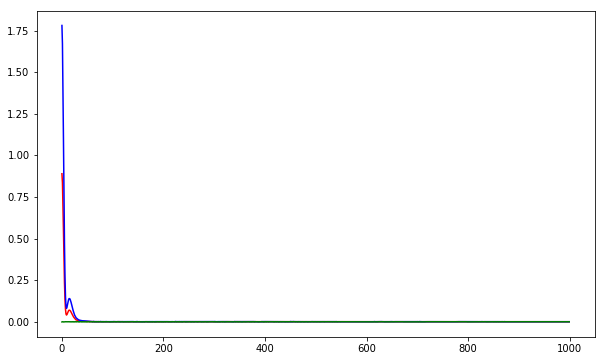

In [101]:
model_text = Text().cuda()
model_audio = Audio().cuda()

loss = []
cross_modal = []
diversity = []
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
distance = nn.CosineEmbeddingLoss()
iterations = 1000
optimizer_audio = torch.optim.SGD(model_audio.parameters(),weight_decay=0.0005,momentum=0.9,lr=0.01)
optimizer_text = torch.optim.SGD(model_text.parameters(),weight_decay=0.0005,momentum=0.9,lr=0.01)
# optimizer_video = torch.optim.SGD(model_video.parameters(),weight_decay=0.0005,momentum=0.9,lr=0.01)

for iteration in range(iterations):
    

    i,j = sample(range(0,15290),2)
    
    ai = torch.unsqueeze(Train_audio[i],0).cuda()
    aj = torch.unsqueeze(Train_audio[j],0).cuda()
    
    ti = torch.unsqueeze(Train_text[i],0).cuda()
    tj = torch.unsqueeze(Train_text[j],0).cuda()
    
    optimizer_audio.zero_grad()
    optimizer_text.zero_grad()
    
    xi = model_audio(ai)
    xj = model_audio(aj)
    
    yi = model_text(ti)
    yj = model_text(tj)
    
    xi = torch.unsqueeze(xi,0)
    xj = torch.unsqueeze(xj,0)
    
    yi = torch.unsqueeze(yi,0)
    yj = torch.unsqueeze(yj,0)

    
    cross_modal_loss1 = distance(xi,yi,torch.ones(1).cuda()) 
    cross_modal_loss2 = distance(xj,yj,torch.ones(1).cuda())
    diversity_loss1 = -distance(xi,xj,torch.ones(1).cuda()) 
    diversity_loss2 = -distance(yi,yj,torch.ones(1).cuda())
    
    
    total_loss = 0.5*(cross_modal_loss1 + cross_modal_loss2 + diversity_loss1 + diversity_loss2)
    loss.append(total_loss.item())
    cross_modal.append(cross_modal_loss1.item()+cross_modal_loss2.item())
    diversity.append(diversity_loss1.item()+diversity_loss2.item())
    
    total_loss.backward()
    optimizer_audio.step()
    optimizer_text.step()
    
    if(iteration%100 == 0):
        print("iteration :",iteration," loss :",total_loss.item())
    
    del ai,aj,ti,tj,xi,xj,yi,yj
    del total_loss,cross_modal_loss1,cross_modal_loss2,diversity_loss1,diversity_loss2
    torch.cuda.empty_cache()
    
    
    
plt.plot(loss,'r',cross_modal,'b',diversity,'g')
plt.show()

In [102]:
!nvidia-smi

Tue Jul 16 05:17:13 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |   3679MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

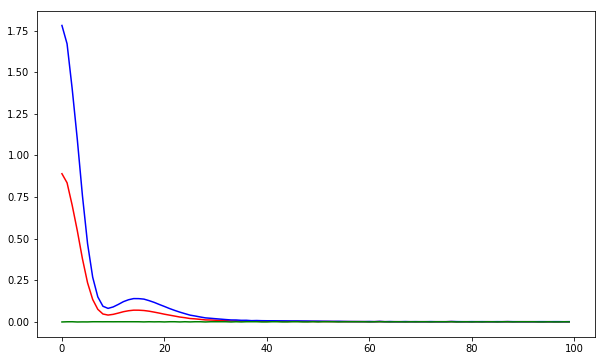

In [103]:
plt.plot(loss[:100],'r',cross_modal[:100],'b',diversity[:100],'g')
plt.show()

In [104]:
Test_labels_sad.shape

torch.Size([4832, 1])

In [0]:
class classifier(nn.Module):
    def __init__(self):
        super(classifier,self).__init__()
        self.dense1 = nn.Linear(32,32)
        self.dense2 = nn.Linear(32,1)
    def forward(self,data):
        x = F.relu(self.dense1(data))
#         x = F.relu(self.dense1(x))
#         x = F.relu(self.dense1(x))
        x = torch.sigmoid(self.dense2(x))
        return x

In [0]:
Train_labels_sad = torch.from_numpy(np.array(Train_labels_sad)).float().cuda()
Test_labels_sad = torch.from_numpy(np.array(Test_labels_sad)).float().cuda()
Test_audio = torch.from_numpy(audio_test).float().cuda()
Test_text = torch.from_numpy(text_test).float().cuda()

In [106]:
!nvidia-smi

Tue Jul 16 05:17:34 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    28W /  70W |   3679MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

[Parameter containing:
tensor([[ 0.0812, -0.1120, -0.0900,  ...,  0.1047, -0.0169, -0.0317],
        [-0.1729, -0.0565, -0.1097,  ...,  0.0071,  0.1092,  0.1261],
        [-0.0043, -0.0762, -0.0145,  ..., -0.0413, -0.0495,  0.0748],
        ...,
        [-0.1257,  0.0622, -0.0078,  ...,  0.0554, -0.1739,  0.1111],
        [-0.1599, -0.0481, -0.1417,  ..., -0.1043, -0.0703,  0.0082],
        [-0.1079, -0.0695,  0.1465,  ...,  0.0639,  0.0670, -0.0174]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.1413,  0.1532,  0.0187, -0.1623,  0.1106, -0.1003, -0.1063, -0.0016,
        -0.0741,  0.0854,  0.1184, -0.0301, -0.0886, -0.0877, -0.0753, -0.0604,
        -0.0896, -0.1593, -0.1537,  0.0220, -0.0829, -0.0742, -0.0328,  0.0317,
         0.1745, -0.1035,  0.0268,  0.0469, -0.1172, -0.0568,  0.0190, -0.1731],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.1631, -0.0572, -0.0466, -0.1576,  0.0814,  0.0896, -0.0431, -0.0802,
       

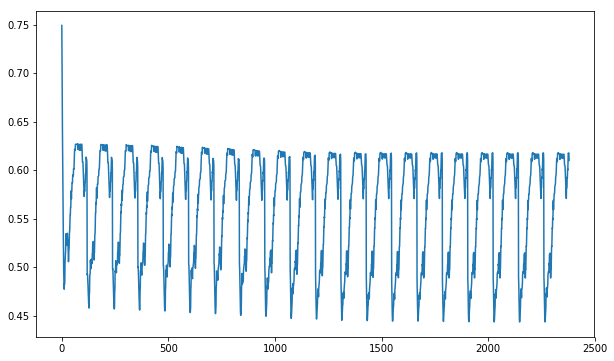

In [107]:
audio_loss = []
model_classifier = classifier().cuda()
w=list(model_classifier.parameters())
print(w)
loss_fn = nn.BCELoss()
optimizer_classifier = torch.optim.Adam(model_classifier.parameters(),lr=0.01)
epochs = 20
model_audio.train()
model_classifier.train()
for epoch in range(epochs):
    for i in range(119):
#         i = sample(range(15160),1)
#         i = i[0]
        
        optimizer_audio.zero_grad()
        optimizer_classifier.zero_grad()
        
        logits = model_classifier(model_audio(Train_audio[i:i+128]))
        
        L = loss_fn(logits,Train_labels_sad[i:i+128])
        L.backward()
        audio_loss.append(L.item())
        
#         optimizer_audio.step()
        optimizer_classifier.step()
    print("Epoch :",epoch+1," loss :",L.item())
        
        
plt.plot(audio_loss)
plt.show()

In [114]:
w=list(model_classifier.parameters())
print(w)

[Parameter containing:
tensor([[ 0.0565, -0.0854, -0.0843,  ...,  0.1493, -0.0159, -0.0130],
        [-0.0535, -0.0033, -0.0352,  ..., -0.0703,  0.1189, -0.0729],
        [-0.0431, -0.0977,  0.0782,  ...,  0.1587,  0.0394, -0.1233],
        ...,
        [-0.1057, -0.0387, -0.0345,  ...,  0.1703, -0.1487,  0.1112],
        [-0.0872, -0.0022, -0.0492,  ..., -0.0605,  0.1352,  0.1422],
        [-0.1540, -0.0091, -0.1085,  ...,  0.0648, -0.0168, -0.0952]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.0236,  0.0882,  0.0831, -0.1374,  0.0258, -0.0687,  0.0590, -0.0639,
        -0.1580,  0.0846,  0.0363, -0.0313, -0.0091,  0.1031, -0.1573, -0.0325,
         0.1259, -0.1011, -0.0691,  0.0705, -0.1494,  0.1487, -0.0211, -0.0442,
        -0.0296, -0.0147, -0.1424, -0.1217,  0.0291,  0.1305, -0.0273, -0.1597],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.0005,  0.0003,  0.1099,  0.1341,  0.0103,  0.0781,  0.0166,  0.0399,
       

In [118]:
model_classifier = classifier().cuda()
w=list(model_classifier.parameters())
print(w)

[Parameter containing:
tensor([[-0.1445, -0.0249, -0.0013,  ...,  0.1737,  0.1105, -0.1739],
        [ 0.1183, -0.0029,  0.1167,  ...,  0.1251, -0.0290,  0.0621],
        [-0.1581,  0.0592, -0.0467,  ...,  0.1101, -0.0139, -0.0559],
        ...,
        [ 0.0445,  0.1613,  0.0853,  ...,  0.0128,  0.1439,  0.0200],
        [ 0.0174, -0.1368,  0.0857,  ...,  0.1062, -0.0066,  0.0658],
        [-0.1232, -0.0448,  0.0970,  ..., -0.0098, -0.0408,  0.1475]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.1746, -0.1178,  0.1345, -0.1163,  0.0948, -0.1237,  0.0507,  0.0286,
         0.1762,  0.1730, -0.0414,  0.0636,  0.0517, -0.0424,  0.0310,  0.1364,
         0.1746, -0.0566,  0.0348,  0.0799,  0.0533, -0.1755,  0.0028, -0.0838,
        -0.0911, -0.0923, -0.0209,  0.1239, -0.0295,  0.0780, -0.1573,  0.1189],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([[-0.1639, -0.0610, -0.0611, -0.0655, -0.0240, -0.0550, -0.0170,  0.1048,
       

In [30]:
!nvidia-smi

Tue Jul 16 04:34:34 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |   1521MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [119]:
model_audio.eval()
model_classifier.eval()

def accuracy(prediction,label):
    prediction = (prediction>0.5)
    acc = torch.sum(prediction==label.byte())
    return 100*(acc.float()/label.size()[0])

prediction = model_classifier(model_audio(Test_audio))
print(accuracy(prediction, Test_labels_sad))

tensor(72.3924, device='cuda:0')


[Parameter containing:
tensor([[-0.1456,  0.1235,  0.1234,  ...,  0.0776, -0.0578,  0.1463],
        [-0.0123,  0.0796, -0.0527,  ..., -0.1101,  0.1333, -0.0764],
        [-0.1012,  0.1737, -0.1260,  ..., -0.0882,  0.0849,  0.1051],
        ...,
        [ 0.0569, -0.0144, -0.0826,  ..., -0.1105, -0.1302,  0.1543],
        [ 0.1625, -0.1463,  0.1180,  ..., -0.1322,  0.0056, -0.1301],
        [-0.0352, -0.0051, -0.1249,  ..., -0.1222, -0.1417, -0.0174]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.0485, -0.0998,  0.0574,  0.0830, -0.0407, -0.0933,  0.0441, -0.0810,
        -0.0530, -0.1421, -0.1334, -0.1288,  0.0135,  0.0488, -0.0868,  0.0266,
         0.0234, -0.1020, -0.1750, -0.1104, -0.1187, -0.0097, -0.0720, -0.0219,
        -0.0024,  0.0865, -0.0058,  0.0566, -0.1312,  0.1658, -0.0920, -0.0456],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.0276, -0.1011,  0.0075,  0.0319,  0.1375,  0.1230,  0.0083,  0.0337,
       

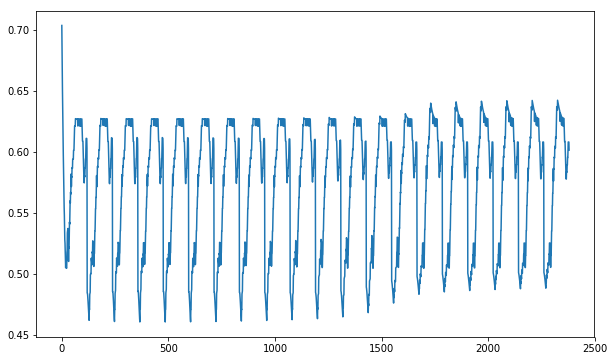

In [146]:
text_loss = []
model_classifier = classifier().cuda()
w=list(model_classifier.parameters())
print(w)
loss_fn = nn.BCELoss()
optimizer_classifier = torch.optim.Adam(model_classifier.parameters(),lr=0.01)
epochs = 20
model_text.train()
model_classifier.train()
for epoch in range(epochs):
    for i in range(119):
#         i = sample(range(15160),1)
#         i = i[0]
        
        optimizer_text.zero_grad()
        optimizer_classifier.zero_grad()
        
        logits = model_classifier(model_text(Train_text[i:i+128]))
        
        L = loss_fn(logits,Train_labels_sad[i:i+128])
        L.backward()
        text_loss.append(L.item())
        
        optimizer_text.step()
        optimizer_classifier.step()
    print("Epoch :",epoch+1," loss :",L.item())
        
        
plt.plot(text_loss)
plt.show()

In [147]:
prediction = model_classifier(model_text(Test_text))
print(accuracy(prediction, Test_labels_sad))

tensor(72.3924, device='cuda:0')


In [148]:
ta = model_classifier(model_audio(Test_audio))
print(ta)

tensor([[0.2985],
        [0.2985],
        [0.2985],
        ...,
        [0.2985],
        [0.2985],
        [0.2985]], device='cuda:0', grad_fn=<SigmoidBackward>)


In [164]:
mc = classifier().cuda()
tt = mc(model_text(Test_text))
# for j in range(4832):
#     print(tt[j].item())
print(torch.sum(tt==tt[0]))
print(accuracy(tt, Test_labels_sad))

tensor(21, device='cuda:0')
tensor(72.3924, device='cuda:0')


In [167]:
print(model_audio(Test_audio))

tensor([[ 0.1235, -0.4787,  0.2446,  ..., -0.1212, -0.0231, -0.0554],
        [ 0.1236, -0.4782,  0.2444,  ..., -0.1209, -0.0233, -0.0554],
        [ 0.1237, -0.4780,  0.2452,  ..., -0.1208, -0.0250, -0.0543],
        ...,
        [ 0.1357, -0.4848,  0.2536,  ..., -0.1264, -0.0324, -0.0465],
        [ 0.1253, -0.4790,  0.2472,  ..., -0.1219, -0.0251, -0.0524],
        [ 0.1231, -0.4779,  0.2450,  ..., -0.1206, -0.0241, -0.0545]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [168]:
print(model_text(Test_text))

tensor([[ 0.0763, -0.2856,  0.1034,  ..., -0.0602,  0.0036, -0.0082],
        [ 0.0763, -0.2858,  0.1036,  ..., -0.0602,  0.0036, -0.0083],
        [ 0.0763, -0.2857,  0.1035,  ..., -0.0601,  0.0036, -0.0082],
        ...,
        [ 0.0762, -0.2855,  0.1034,  ..., -0.0605,  0.0038, -0.0085],
        [ 0.0758, -0.2858,  0.1036,  ..., -0.0601,  0.0036, -0.0081],
        [ 0.0759, -0.2860,  0.1037,  ..., -0.0598,  0.0034, -0.0081]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [138]:
print(ta.shape,tt.shape)

torch.Size([4832, 32]) torch.Size([4832, 32])
